In [1]:
%pip install SQLAlchemy
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from conn import Conn
from clock import Clock
import queries as query
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from config import user, password, host, port, database, \
                    rename_branches, rename_cities, rename_products, rename_sales

In [3]:
plt.rcParams['figure.figsize'] = [14, 6]

# Аналитическая часть


# 1. Требуется рассчитать и вывести название и количество в порядке убывания

In [11]:
path_to_tables = './test_data/'
extension = '.csv'

branches = 'branches'
cities = 'cities'
products = 'products'
sales = 'sales'

In [12]:
db = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')

In [13]:
clock = Clock()

Conn.instanciate() # Create database in psql
Conn.connect()
Conn.execute_many_commands(query.create_tables_commands) # Create tables in psql


clock.stop()

[ERROR] Exception while Conn is executing
 database "postgres" already exists

[INFO] Conn executed successfully
[INFO] Disconnected with PostgreSQL
[INFO] Added database into PostgreSQL
[INFO] Connected with PostgreSQL
[INFO] Conn executed successfully
[INFO] Conn executed successfully
[INFO] Conn executed successfully
[INFO] Conn executed successfully
[TIME] 0.0853121280670166


In [14]:
clock = Clock()

tables = [cities, products, branches, sales]
rename_headers = [rename_cities, rename_products, rename_branches, rename_sales]


for table, renames in zip(tables, rename_headers):
    csv_file = pd.read_csv(f'{path_to_tables}t_{table}{extension}')
    csv_file.rename(columns=renames, inplace=True)
    csv_file.to_sql(name=table, con=db, index=False, if_exists='append')


Conn.execute_many_commands(query.set_indexes) #Добавление индексов

Conn.disconnect()

[INFO] Conn executed successfully
[INFO] Conn executed successfully
[INFO] Conn executed successfully
[INFO] Disconnected with PostgreSQL


In [15]:
clock = Clock()
Conn.connect()

top_10_shops = Conn.select(query.top_10_shops)
top_10_shops = pd.DataFrame(top_10_shops, columns=['Магазин', 'Кол-во продаж'])
top_10_shops.index += 1

print('+ -- Десять первых магазинов по количеству продаж -- +')
print(top_10_shops)
print('+', '-'*50, '+\n')

Conn.disconnect()
clock.stop()


[INFO] Connected with PostgreSQL
[INFO] Conn selected successfully
+ -- Десять первых магазинов по количеству продаж -- +
                       Магазин  Кол-во продаж
1            Новосиб Ватутина           87218
2      Ростов Красноармейская           68683
3           Омск  на Гагарина           66515
4   яВладивосток  Луговая МБТ           62473
5    яКомсомольск Аллея Труда           59503
6   яН.Новгород Пл. Революции           59166
7            Омск на пр. Мира           56188
8    яСаратов Университетская           55963
9                 ЕКБ Вайнера           55570
10           Ростов Вавилония           53949
+ -------------------------------------------------- +

[INFO] Disconnected with PostgreSQL
[TIME] 0.8313767910003662


In [16]:
clock = Clock()
Conn.connect()

top_10_storages = Conn.select(query.top_10_storages)
top_10_storages = pd.DataFrame(top_10_storages, columns=['Склад', 'Кол-во продаж'])
top_10_storages.index += 1

print('+ -- Десять первых складов по количеству продаж -- +')
print(top_10_storages)
print('+', '-'*50, '+\n')

Conn.disconnect()
clock.stop()

[INFO] Connected with PostgreSQL
[INFO] Conn selected successfully
+ -- Десять первых складов по количеству продаж -- +
                Склад  Кол-во продаж
1     Новосиб Склад           366395
2       Самара Склад          222066
3   ЕКБ старый cклад          213456
4       Казань Склад          184080
5          Хаб Склад          149743
6          Мск Склад          140716
7      Иркутск склад          127398
8       Ростов Склад          100343
9        Тула Склад            90408
10         Кра Склад           49296
+ -------------------------------------------------- +

[INFO] Disconnected with PostgreSQL
[TIME] 0.49399852752685547


In [17]:
clock = Clock()
Conn.connect()

top_10_products_among_storages = Conn.select(query.top_10_products_among_storages)
top_10_products_among_storages = pd.DataFrame(top_10_products_among_storages, columns=['Товар', 'Кол-во продаж'])
top_10_products_among_storages.index += 1

print('+ -- Десять самых продаваемых товаров по складам -- +')
print(top_10_products_among_storages)
print('+', '-'*50, '+\n')

Conn.disconnect()
clock.stop()

[INFO] Connected with PostgreSQL
[INFO] Conn selected successfully
+ -- Десять самых продаваемых товаров по складам -- +
                                                Товар  Кол-во продаж
1                             Доставка внутри региона        1035814
2                             Обработка грузов на РРЦ         172081
3                              Доставка от поставщика          43336
4       Доставка грузов АВТО Новосибирск  Новосибирск          17572
5           Доставка грузов АВТО Хабаровск  Хабаровск          14873
6                 Доставка грузов АВТО Самара  Самара          12168
7              Доставка грузов АВТО Казань - > Казань          11710
8   Доставка грузов АВТО Екатеринбург - > Екатерин...          11631
9                    Доставка грузов АВТО Самара  Уфа          10833
10                           Доставка между регионами          10448
+ -------------------------------------------------- +

[INFO] Disconnected with PostgreSQL
[TIME] 0.49399781227111816


In [18]:
clock = Clock()
Conn.connect()

top_10_products_among_shops = Conn.select(query.top_10_products_among_shops)
top_10_products_among_shops = pd.DataFrame(top_10_products_among_shops, columns=['Товар', 'Кол-во продаж'])
top_10_products_among_shops.index += 1

print('+ -- Десять самых продаваемых товаров по магазинам -- +')
print(top_10_products_among_shops)
print('+', '-'*50, '+\n')

Conn.disconnect()
clock.stop()

[INFO] Connected with PostgreSQL
[INFO] Conn selected successfully
+ -- Десять самых продаваемых товаров по магазинам -- +
                                                Товар  Кол-во продаж
1   Маршрутизатор D-Link DIR-300 NRU/NRA 4x10/100B...          39341
2                   Память Trans Flash (microSD) 2 Gb          30659
3                 Память Trans Flash (microSDHC) 4 Gb          26690
4   Лицензия Microsoft Windows 7 Home Basic 32-bit...          23798
5           Кабель USB2.0 A (вилка) - B (вилка), 1.8m          23024
6   Маршрутизатор D-Link DIR-615/А/М1А 4x10/100Bas...          19308
7           Разъем Noname [RJ45, 8P8C, кат. 5e, 1 шт]          18942
8   ПО "Kaspersky Internet Security" версия 2012, ...          14531
9   Память Kingston (microSDHC) 4 Gb class 2/4 SDC...          13161
10  Веб-камера Logitech HD Webcam C270 1280x720 Mi...          12715
+ -------------------------------------------------- +

[INFO] Disconnected with PostgreSQL
[TIME] 0.8279991149902344


In [19]:
clock = Clock()
Conn.connect()

top_10_most_selling_cities = Conn.select(query.top_10_most_selling_cities)
top_10_most_selling_cities = pd.DataFrame(top_10_most_selling_cities, columns=['Город', 'Кол-во продаж'])
top_10_most_selling_cities.index += 1

print('+ -- Десять городов, в которых больше всего продавалось товаров -- +')
print(top_10_most_selling_cities)
print('+', '-'*50, '+\n')

Conn.disconnect()
clock.stop()

[INFO] Connected with PostgreSQL
[INFO] Conn selected successfully
+ -- Десять городов, в которых больше всего продавалось товаров -- +
              Город  Кол-во продаж
1       Новосибирск         604339
2      Екатеринбург         419835
3            Казань         398584
4    Ростов-на-Дону         391134
5            Самара         323775
6              Омск         292891
7         Хабаровск         278054
8           Иркутск         271139
9   Нижний Новгород         241233
10          Барнаул         230575
+ -------------------------------------------------- +

[INFO] Disconnected with PostgreSQL
[TIME] 1.1329994201660156


# 2. Требуется рассчитать и вывести в какие часы и в какой день недели происходит максимальное количество продаж.

In [20]:
clock = Clock()
Conn.connect()

sql = 'SELECT * FROM sales;'
df = pd.read_sql(sql, con=Conn.connection)

Conn.disconnect()
clock.stop()

[INFO] Connected with PostgreSQL
[INFO] Disconnected with PostgreSQL
[TIME] 30.793089151382446


In [21]:
clock = Clock()

df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.dayofweek + 1 #to format weekday from 1 to 7

clock.stop()

[TIME] 0.40000104904174805


In [22]:
clock = Clock()

sales_by_hour = df.groupby('hour').describe().quantity['count']
# в sales_by_hour теперь хранятся количества продаж, где индекс - это час продажи

print(sales_by_hour.idxmax())

clock.stop()

15
[TIME] 3.6779162883758545


# С 15:00 до 16:00 делается больше всего продаж

Text(0, 0.5, 'Количество продаж')

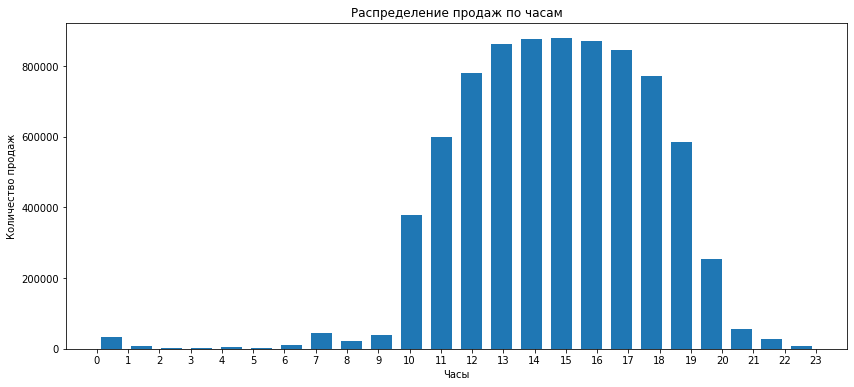

In [23]:
hist = df['hour'].plot(kind='hist', 
                title='Распределение продаж по часам', 
                bins=24, 
                xticks=range(24),
                rwidth=0.7)
hist.set_xlabel('Часы')
hist.set_ylabel('Количество продаж')

In [24]:
clock = Clock()

sales_by_weekday = df.groupby('weekday').describe().quantity['count']
# в sales_by_weekday теперь хранятся количества продаж, где индекс - это день недели от 1 до 7 (понед. - воскр.)

print(sales_by_weekday.idxmax())

clock.stop()

6
[TIME] 3.280712842941284


# В субботу делается больше всего продаж

Text(0, 0.5, 'Количество продаж')

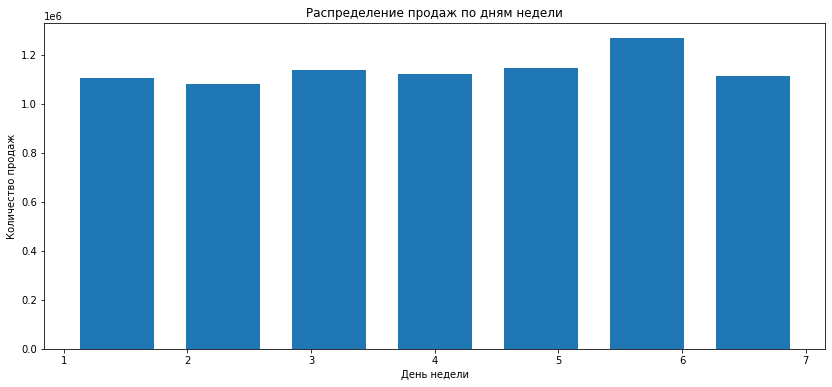

In [25]:
hist2 = df['weekday'].plot(kind='hist', 
                           bins=7, 
                           title='Распределение продаж по дням недели', 
                           xticks=range(1, 8),
                           rwidth=0.7)
hist2.set_xlabel('День недели')
hist2.set_ylabel('Количество продаж')

# Расчетная часть

In [26]:
clock = Clock()
Conn.connect()

sql = query.sales_of_products
df = pd.read_sql(sql, con=Conn.connection)

Conn.disconnect()
clock.stop()

[INFO] Connected with PostgreSQL
[INFO] Disconnected with PostgreSQL
[TIME] 1.5622305870056152


In [27]:
clock = Clock()

categories = ['Наименее продаваемый', 'Средне продаваемый', 'Наиболее продаваемый']

df['category'] = pd.qcut(df['count'],
                              q=[0, .3, .9, 1],
                              labels=categories)
df.drop('count', axis=1, inplace=True)
print(df.head())

clock.stop()

                            ref_product              category
0  000c9ee5-d56c-11de-87fb-00151716f9f5  Наименее продаваемый
1  000f6e23-dfbf-11de-9339-00151716f9f5    Средне продаваемый
2  0016f7a3-d839-11e0-b7e0-001517c526f0    Средне продаваемый
3  00337cb5-ed5d-11e0-b8cc-001517c526f0  Наименее продаваемый
4  00390b11-58fe-11e0-bf69-001517c526f0    Средне продаваемый
[TIME] 0.0220491886138916


In [28]:
clock = Clock()

#Создание новой csv таблицы
df.to_csv(f'{path_to_tables}products_with_category{extension}', 
        header=['Номенклатура', 'КлассТовара'],
        sep=',',
        encoding='utf-8')

clock.stop()

[TIME] 0.04199719429016113


In [29]:
clock = Clock()
Conn.connect()

products_with_category = 'products_with_category'
df.to_sql(name=products_with_category, con=db, index=False, if_exists='append')

Conn.disconnect()
clock.stop()

[INFO] Connected with PostgreSQL
[INFO] Disconnected with PostgreSQL
[TIME] 0.20100045204162598
